In [0]:
from attention import AttentionLayer

In [0]:
 %tensorflow_version 1.x 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import os
import re
import numpy as np


In [0]:
data = pd.read_csv(r'/content/drive/My Drive/datasets/wikihowAll.csv')
data = data.astype(str)
rows, columns = data.shape


In [0]:
def shuffle(df, n=1, axis=0):
  df = df.copy()
  for _ in range(n):
    df.apply(np.random.shuffle, axis=axis)
  return df

In [0]:
np_array=np.array(data)

In [0]:
np.random.shuffle(np_array)

In [0]:
np_array.shape

(215365, 3)

In [0]:
np_array=np_array[:80000]

In [0]:
data=pd.DataFrame(np_array,columns=['headline','bakwas','Text'])

In [0]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
data.head()

,headline,bakwas,Text
0,"\nPeel a banana and mash it with a fork in a bowl.,\nAdd 1 tablespoon (15 grams) of honey to the bowl.,\nConsider adding 10 drops of lemon juice if you have oily skin.,\nConsider adding ½ of an av...",How to Nourish Your Face Using a Banana2,"Bananas are great at exfoliating your skin, and returning that healthy glow. They are also very moisturizing., Honey is not only moisturizing, but also antibacterial. It's great for relieving dry..."
1,\nPlay PlayStation online games the same way you would play offline games except you must join a game on the PlayStation Network.,How to Play PlayStation Online3,The option to join a network game appears in the menu when you begin to play any game that is network-enabled. Here are the titles of some popular PS3 online games that you might want to try.\n\n...
2,"\nCultivate a professional appearance.,\nMaintain your privacy.,\nBe professional in group work activities.,\nKeep your workspace neat and organized.",How to Earn Respect at Work3,"People respond well to colleagues who appear healthy and professional.In order to command respect, be sure that you are putting forward an image that is professional and put-together. This includ..."
3,"\nDefine the category of fraud.,\nKnow the elements of fraud.,\nChoose a court.,\nComplete the petition.,\nFile the petition with the court.,\nHave the petition served on the other party.,\nSuppor...",How to Prove Fraud,"Even though fraud comes from the English common law, there are several modern categories that most fraud falls into. Understanding the type of fraud can help you prove your case. These types of f..."
4,"\nKeep anything in writing.,\nRecord phone calls or voicemails.,\nBe observant all the time.,\nWrite notes in a journal.,\nWatch for any changes in behavior or escalation.",How to Deal With Stalkers4,"If you receive any emails, social media messages, hand-written notes, or gifts, keep them. Your first instinct may be to destroy anything related to the stalker who is making you uncomfortable, b..."


In [0]:
data.rename(columns={'text':'Text'},inplace=True)

In [0]:
data.columns

Index(['headline', 'bakwas', 'Text'], dtype='object')

In [0]:
data.drop_duplicates(subset=['Text'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)   #dropping na


In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}



In [0]:
data['Text'][:10]


0     Bananas are great at exfoliating your skin, and returning that healthy glow. They are also very moisturizing., Honey is not only moisturizing, but also antibacterial. It's great for relieving dry...
1     The option to join a network game appears in the menu when you begin to play any game that is network-enabled. Here are the titles of some popular PS3 online games that you might want to try.\n\n...
2     People respond well to colleagues who appear healthy and professional.In order to command respect, be sure that you are putting forward an image that is professional and put-together. This includ...
3     Even though fraud comes from the English common law, there are several modern categories that most fraud falls into. Understanding the type of fraud can help you prove your case. These types of f...
4     If you receive any emails, social media messages, hand-written notes, or gifts, keep them. Your first instinct may be to destroy anything related to the stalker who is making

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))

In [0]:
data.columns

Index(['headline', 'bakwas', 'Text'], dtype='object')

In [0]:
data.rename(columns={'headline':'Summary'},inplace=True)

In [0]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)


In [0]:
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')


In [0]:
for i in range(5):
    print("Review:",data['cleaned_text'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("\n")


Review: bananas great exfoliating skin returning healthy glow also moisturizing honey moisturizing also antibacterial great relieving dry skin zapping blemishes lemon juice great fighting acne blemishes tightens pores reduces oil also helps exfoliate skin keep mind however lemon juice makes skin extra sensitive sunlight best use mask night bed extra honey help balance extra ingredient also give facial extra moisturizing powder lumps chunks clumps want texture smooth take care avoid delicate area around eyes place leftovers jar refrigerate wait try keep head upright possible facial slide need use gentle facial cleanser follow splash cold water upon face seal pores done gently pat face dry soft clean towel continue use notice reduction dryness blemishes skin also healthy glow
Summary: _START_ peel banana and mash it with fork in bowl add tablespoon grams of honey to the bowl consider adding drops of lemon juice if you have oily skin consider adding of an avocado and an extra tablespoon g

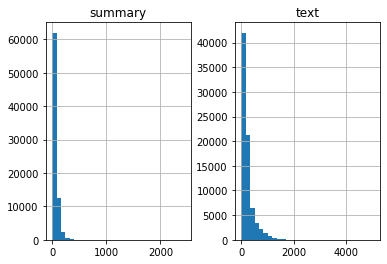

In [0]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()


In [0]:
max_len_text=80 
max_len_summary=10


In [0]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['cleaned_summary'],test_size=0.37,random_state=0,shuffle=True) 


In [0]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1


In [0]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1


In [0]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 


encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 


decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()





Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 500)      42183000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 80, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)


In [0]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 49010 samples, validate on 28785 samples
Epoch 1/50
49010/49010 [==============================] - 105s 2ms/sample - loss: 6.7243 - val_loss: 6.2483
Epoch 2/50
49010/49010 [==============================] - 97s 2ms/sample - loss: 6.0399 - val_loss: 5.8745
Epoch 3/50
49010/49010 [==============================] - 97s 2ms/sample - loss: 5.7198 - val_loss: 5.6657
Epoch 4/50
49010/49010 [==============================] - 97s 2ms/sample - loss: 5.4264 - val_loss: 5.4717
Epoch 5/50
49010/49010 [==============================] - 97s 2ms/sample - loss: 5.1794 - val_loss: 5.3280
Epoch 6/50
49010/49010 [==============================] - 97s 2ms/sample - loss: 4.9561 - val_loss: 5.3427
Epoch 00006: early stopping


In [0]:
model.save('jobhihai.h5')

In [0]:
model.save('jobhihai1.pickle')